## Imports

In [1]:
!pip3 install torch==1.8.2+cu102 torchvision==0.9.2+cu102 torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
!git clone https://github.com/ultralytics/yolov5  # clone
!cd ./yolov5 && pip install -r ./requirements.txt  # install

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
You should consider upgrading via the '/home/work/Dev/object_detection/venv/bin/python -m pip install --upgrade pip' command.
fatal: destination path 'yolov5' already exists and is not an empty directory.
You should consider upgrading via the '/home/work/Dev/object_detection/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import cv2

torch.cuda.is_available()

True

In [18]:
%matplotlib inline

## Load Model

In [19]:
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model = torch.hub.load('ultralytics/yolov5', 'yolov5l6')

Using cache found in /home/work/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-2-8 torch 1.8.2+cu102 CUDA:0 (NVIDIA GeForce MX150, 2003MiB)

Fusing layers... 
Model Summary: 476 layers, 76726332 parameters, 0 gradients, 111.4 GFLOPs
Adding AutoShape... 


In [20]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      

## Making Detections

In [9]:
im = 'https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/wokAAOSwWv5aA2pL/$_75.PNG'

In [16]:
results = model(im)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 7))

plt.imshow(np.squeeze(results.render()))

plt.axis('off')
plt.show()

In [22]:
im = 'https://i.pinimg.com/originals/78/fd/56/78fd56ee21d203df4083e46ecd2d2eda.png'

results = model(im)

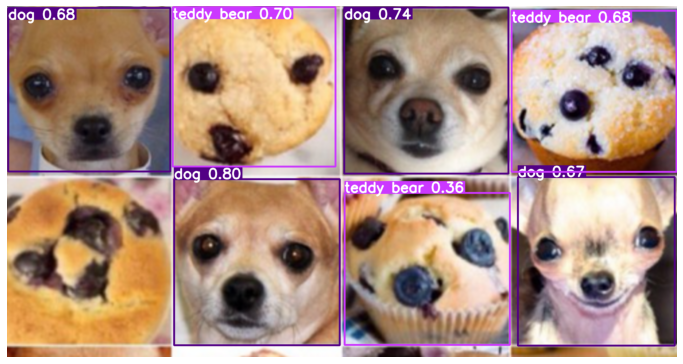

In [23]:
plt.figure(figsize=(12, 7))

plt.imshow(np.squeeze(results.render()))

plt.axis('off')
plt.show()

## Real Time Object Detection

In [21]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # model detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.
